<a href="https://colab.research.google.com/github/polinakopteva/salifort_motors/blob/main/Salifort_Motors_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Providing data-driven suggestions for HR**

## PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

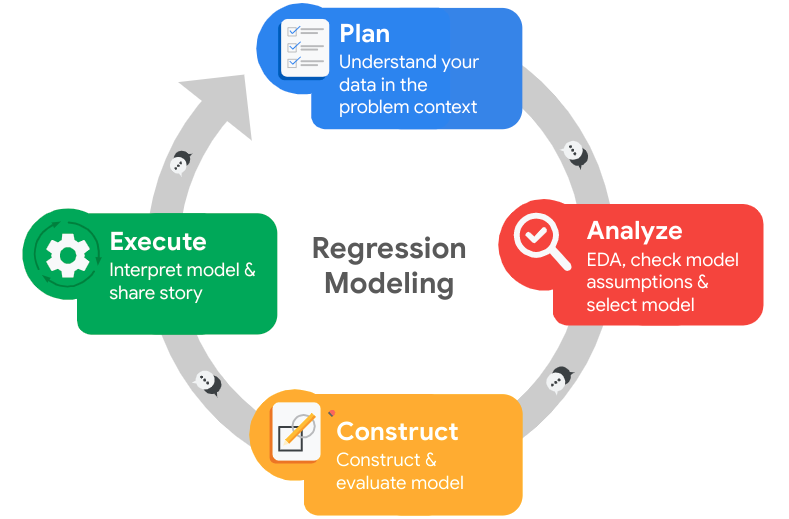



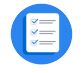

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Our goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

The dataset that we'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [42]:
# For data manipulation
import numpy as np
import math
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

In [43]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [44]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


At first glance, we don't have missing values, we won't be changing types of columns and there are different column naming styles.

Further, we will rename columns, check for missing data, duplicates and outliers.

### Gather descriptive statistics about the data

In [45]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Columns `satisfaction_level`, `last_evaluation`, `Work_accident`, `left` and `promotion_last_5years` are stored as binomial data.

The maximum number of projects is 7, average hours employees work per month is 201. On average, employees work 3.5 years in the company.

### Rename columns

In [46]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [47]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [48]:
df0.isna().any(axis=1).sum()

0

### Check duplicates

In [49]:
df0.duplicated().sum()

3008

In [50]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


We could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. 

With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. We will proceed by dropping them.

In [51]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

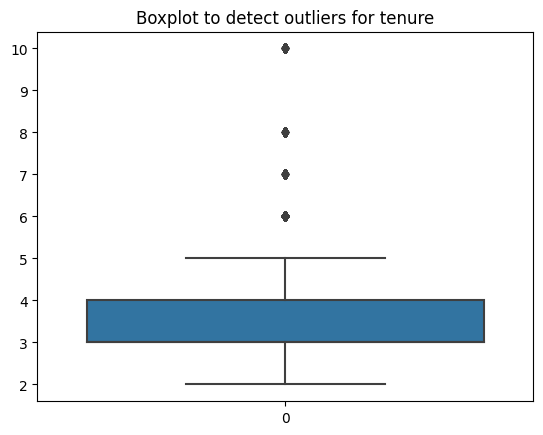

In [52]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df1['tenure'])
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.show()

The boxplot above shows that there are a few outliers in the `tenure` variable. 

Next, we will investigate how many rows in the data contain outliers in the `tenure` column.

In [53]:
def number_of_outliers_via_limits(data, column):
  '''
  Arguments:
        data: dataframe in which stored column
        column (string): name of the column in dataframe
  
    Determine the number of rows containing outliers
    Returns lower and upper limit (respectively) via IQR.  
  '''
  # Compute the 25th percentile value
  percentile25 = data[column].quantile(0.25)
  # Compute the 75th percentile value
  percentile75 = data[column].quantile(0.75)
  # Compute the interquartile range
  iqr = percentile75 - percentile25
  # Define the upper limit and lower limit for non-outlier values
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  print(f'Lower limit: {lower_limit}')
  print(f'Upper limit: {upper_limit}')
  # Identify subset of data containing outliers
  outliers = data[(data[column] > upper_limit) | (data[column] < lower_limit)]
  # Count how many rows in the data contain outliers
  print(f'Number of rows in the data containing outliers in {column}: {len(outliers)}')
  return lower_limit, upper_limit

In [54]:
number_of_outliers_via_limits(df1, 'tenure')

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in tenure: 824


(1.5, 5.5)

Certain types of models are more sensitive to outliers than others. When we get to the stage of building your model, we will consider whether to remove outliers, based on the type of model we decide to use.

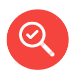
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, we will start examining the variables of interest, and create plots to visualize relationships between variables in the data.

We will start by creating histogram of `number_project` column, comparing employees who stayed versus those who left

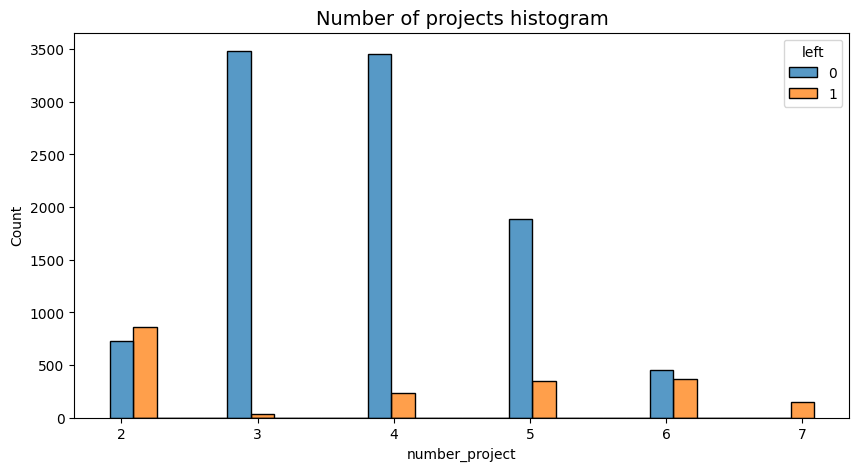

In [55]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2)
ax.set_title('Number of projects histogram', fontsize='14')
plt.show()

We can see that all employees with 7 projects have left the company.

Comparison of employees with 7 project and those who left confirms that all employees with 7 projects did leave.

In [56]:
len(df1[(df1['number_project']==7)&(df1['left']==1)]) == len(df1[df1['number_project']==7])

True

Next, we will create a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed and who left.

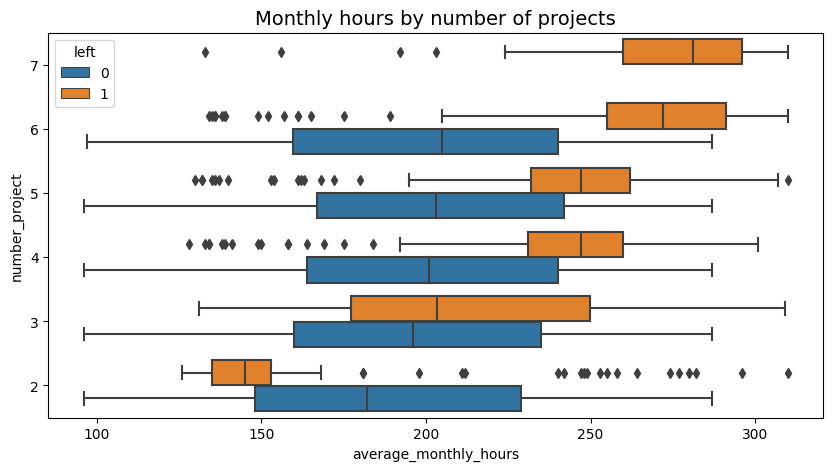

In [57]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h")
ax.invert_yaxis()
ax.set_title('Monthly hours by number of projects', fontsize='14')
plt.show()

It is likely that individuals who work on more projects also work longer hours, as evidenced by the increase in mean hours worked with each additional project. However, further analysis of the data reveals some notable patterns.

> Firstly, there are two distinct groups of employees who left the company: 
* One group worked significantly fewer hours than their peers with the same number of projects, and it is possible that they were terminated or were in the process of leaving the company. 
* The other group worked significantly more hours, indicating that they likely quit voluntarily. It is reasonable to assume that these individuals were highly productive and made significant contributions to their projects.

> Secondly, all employees who had worked on seven projects left the company, and the interquartile ranges for this group and those who worked on six projects were much larger than for any other group, indicating that they may have been particularly overworked (~255–295 hours/week).

> Thirdly, the data suggests that the optimal number of projects for employees to work on is between three and four, as the ratio of employees who left versus those who stayed was relatively low for these cohorts.

> Finally, assuming a standard work week of 40 hours and two weeks of vacation per year, it appears that all groups, except for those who worked on two projects, worked considerably more hours per month than what could be considered a reasonable workload. This suggests that the employees in this company may be overworked.

Let's calculate the average number of working hours per month of employees working Monday–Friday

In [58]:
# 50 - weeks
# 40 hours per week (5 days and 8 work hours)
# 12 - months = year
avg_work_hours = 50 * 40 / 12
print(f'Average number of working hours per month of employees working Monday–Friday - {math.ceil(avg_work_hours)} hours per month')

Average number of working hours per month of employees working Monday–Friday - 167 hours per month


Now let's compare satisfaction of the workers and their working hours

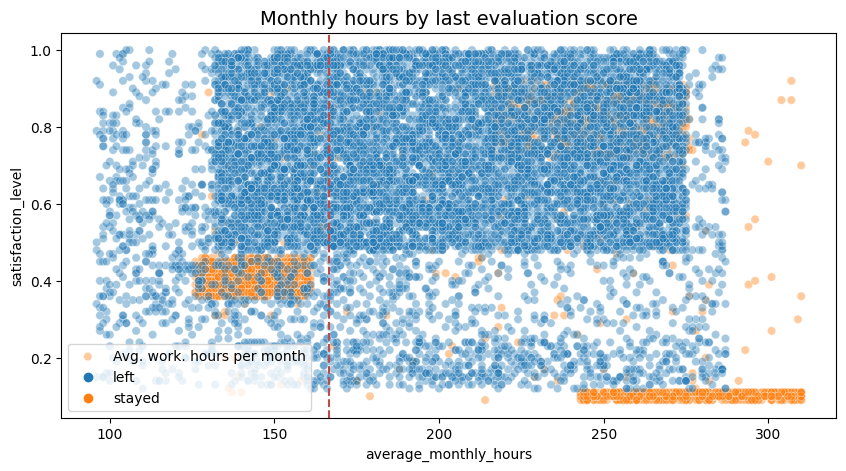

In [59]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=avg_work_hours, color='#BF4B49', label='Avg. work. hours per month', ls='--')
plt.legend(labels=['Avg. work. hours per month', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')
plt.show()

According to the scatterplot displayed above, there was a notable cluster of employees who worked between approximately 240 to 315 hours per month. The 315 working hours per month equates to over 75 hours per week for a whole year, which is an excessive amount of work. It is possible that this group's low levels of job satisfaction were related to their workload.

The plot also reveals another group of employees who left the company, whose working hours were more typical. However, their satisfaction levels were also low, hovering around 0.4. It is difficult to discern the reasons for their departure, but it is plausible that they felt compelled to work longer hours, possibly due to peer pressure, which may have contributed to their low satisfaction levels.

Lastly, there was a group of employees who worked between approximately 210 to 280 hours per month, with satisfaction levels ranging from approximately 0.7 to 0.9.

It is noteworthy that the shapes of the distributions in the data appear to be unusual, which could indicate data manipulation or the use of synthetic data.

Next, we will visualize tunover of the workers by tenure

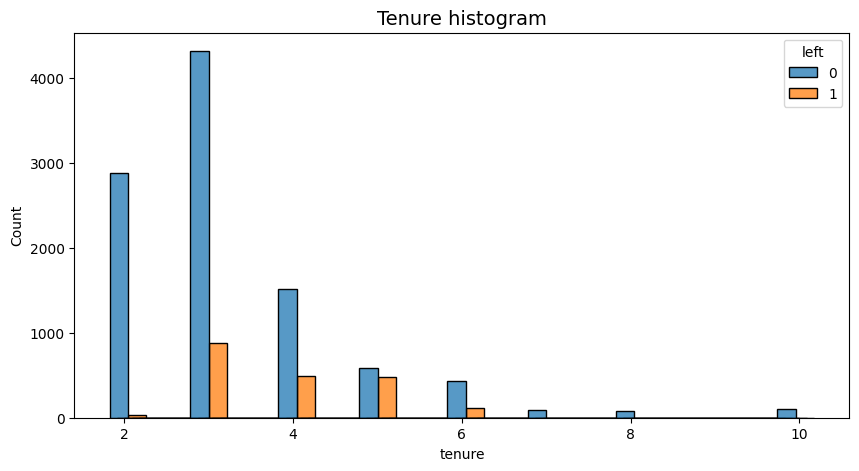

In [60]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5)
ax.set_title('Tenure histogram', fontsize='14')
plt.show()

The longest-tenured employees didn't leave. HR department needs to pay more attention to the workers with 3-6 years of tenure

Let's plot their satisfaction levels.

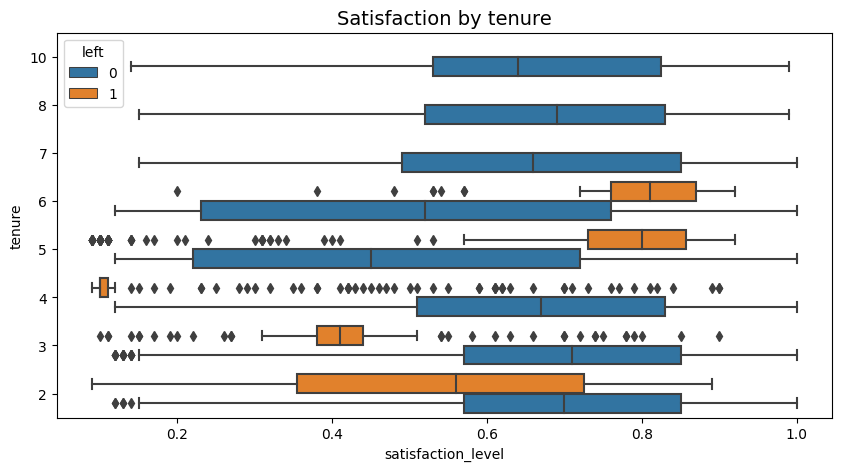

In [61]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h")
ax.invert_yaxis()
ax.set_title('Satisfaction by tenure', fontsize='14')
plt.show()

The scatterplot offers various insights into the employee turnover patterns, such as:

> Retiring employees can be divided into two main categories: those who are dissatisfied and have relatively short tenures, and those who are highly satisfied and have medium-length tenures.

> Four-year employees who left appear to have lower satisfaction levels than other employees. It might be worthwhile to investigate if any company policy changes around the four-year mark might have contributed to their dissatisfaction.

> The most tenured employees did not leave the company, and their satisfaction levels were similar to those of newer employees who stayed.

> The histogram suggests that there are relatively few employees with longer tenures, who may be the higher-ranking and better-compensated employees.

In [62]:
df1.groupby(['left'])['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Previously we compare tenure and satisfaction, now we will compare tenure with salary to find patterns.

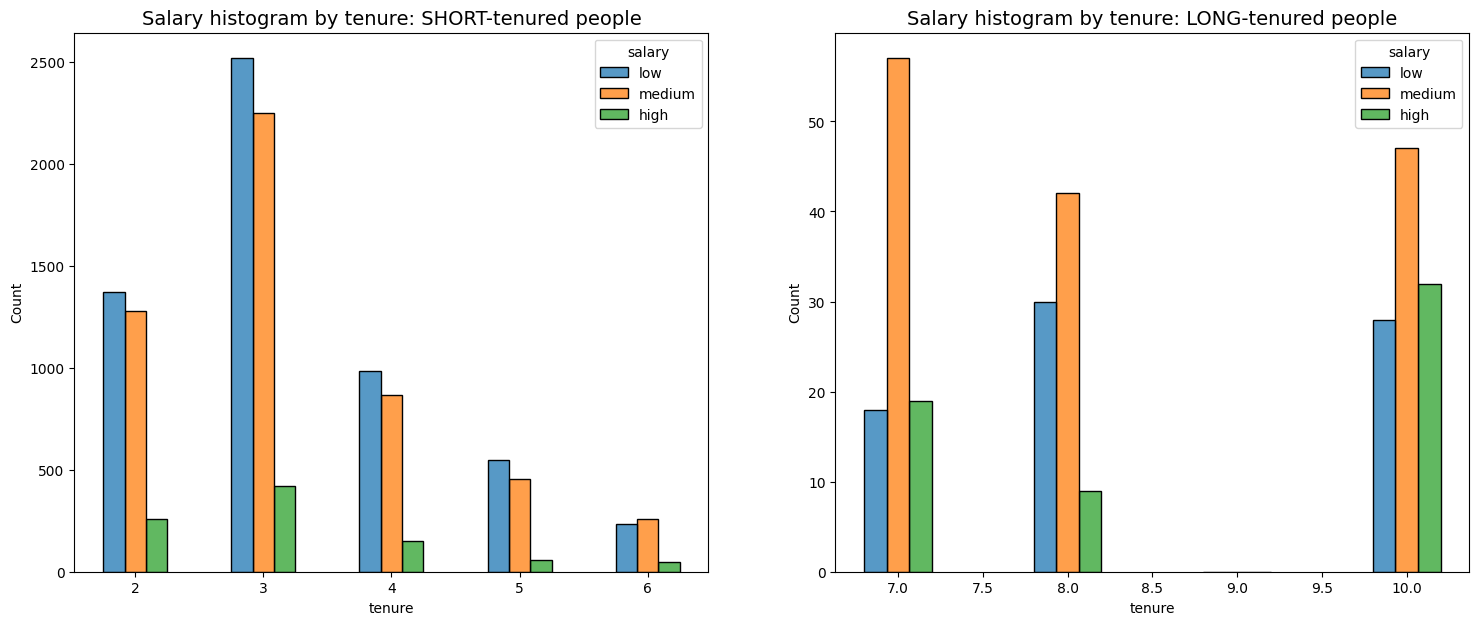

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(18,7))

tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]

sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: SHORT-tenured people', fontsize='14')

sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: LONG-tenured people', fontsize='14')

plt.show()

The charts above show that long-tenured employees weren't disproportionately high-paid employees. So no new patterns were discovered.

Let's explore whether there's a correlation between working long hours and receiving high evaluation scores.

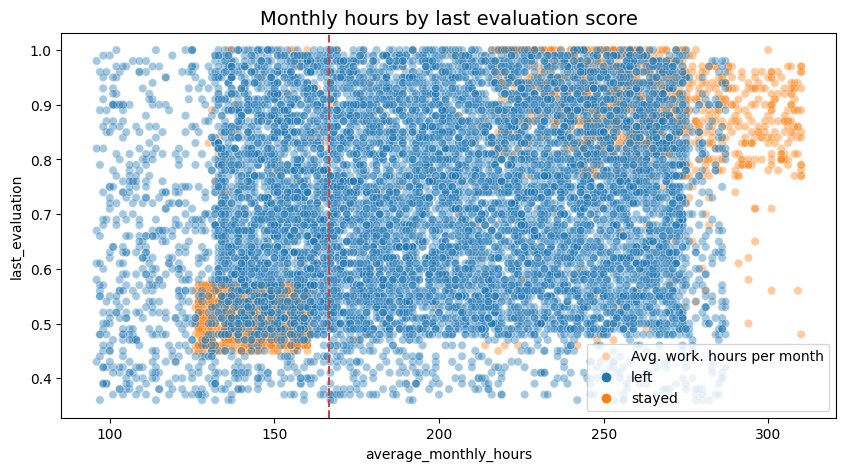

In [64]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=avg_work_hours, color='#BF4B49', label='Avg. work. hours per month', ls='--')
plt.legend(labels=['Avg. work. hours per month', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')
plt.show()

Several observations can be gleaned from the scatterplot:

> Two categories of retiring employees can be identified: 
* highly productive overworked employees with high evaluation scores
* employees who worked less than the monthly average of 167 hours and received lower evaluation scores.

> A correlation can be seen between evaluation score and hours worked, although there are exceptions to this trend.

> The upper left quadrant of the plot is sparsely populated; working long hours doesn't necessarily lead to a high evaluation score.

> Most employees in the company work well beyond the average 167 working hours per month.

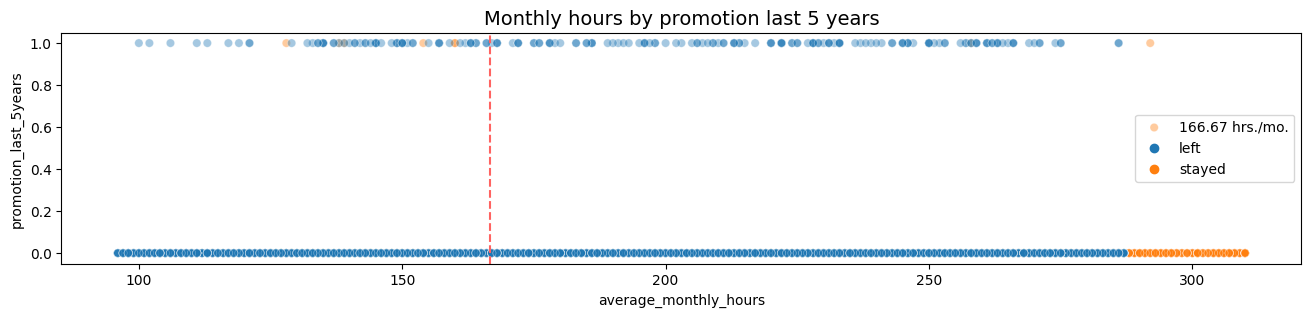

In [65]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- there are a bit employees who were promoted in the last five years left
- there are few employees who worked the longest hours were promoted
- all of the employees who left were working the most hours

Next we will study how the employees who left are distributed across departments.

In [66]:
df1['department'].value_counts().to_frame().rename({'department' : 'Number of workers who left'}, axis=1)

,Number of workers who left
sales,3239
technical,2244
support,1821
IT,976
RandD,694
product_mng,686
marketing,673
accounting,621
hr,601
management,436


We can see that in **sales** department has the most laid-off employees, but we need to compare the number of employees who stayed and quit.

Let's create stacked histogram to achive our goal.

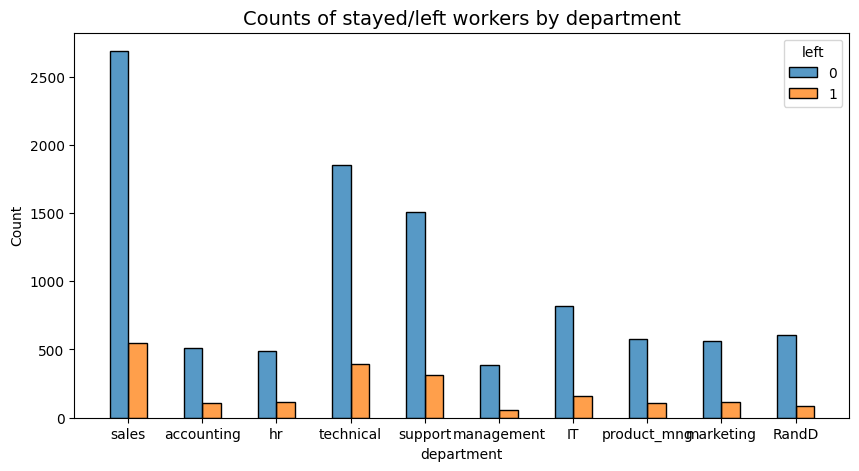

In [67]:
plt.figure(figsize=(10,5))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
# plt.xticks(rotation='45')
plt.title('Counts of stayed/left workers by department', fontsize=14);

The data doesn't show any department with a notably higher or lower proportion of employees who left the company compared to those who stayed.

Additionally, it may be useful to investigate potential correlations between the different variables in the dataset.

<ipython-input-68-605d218dc723>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))


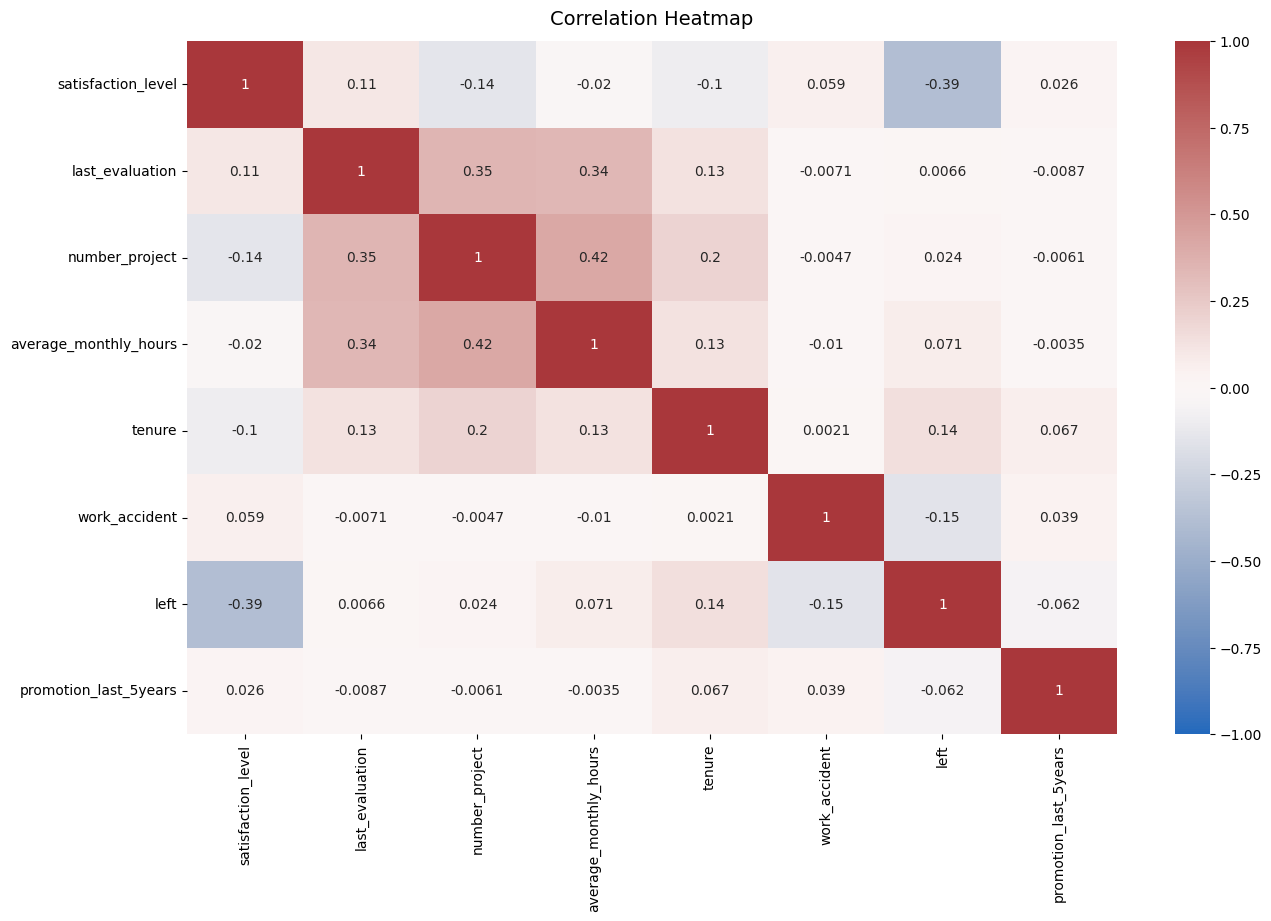

In [68]:
plt.figure(figsize=(15, 9))
ax = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
ax.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

According to the correlation heatmap, there is a positive correlation among the number of projects, monthly hours, and evaluation scores. On the other hand, the correlation between leaving the company and satisfaction level is negative.

### Insights

Based on the EDA, it seems that employees are leaving the company due to poor management: long working hours, high number of projects, and low satisfaction levels are associated with leaving. 

It can be demotivating for employees to work long hours without seeing career growth or receiving positive evaluation scores. A significant proportion of employees at this company may be experiencing burnout. 

Additionally, the data suggests that employees who have spent more than six years at the company tend not to leave.

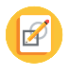
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

Our goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves **binary classification**, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). 

Since the variable you want to predict (whether an employee leaves the company) is **categorical**, you could either build a **Logistic Regression** model, or a **Tree-based Machine Learning model**.

### Modeling Approach 1: Logistic Regression Model

Binomial logistic regression suits the task because the task and the modelling approach involves binary classification.

In [69]:
# One-hot encode the categorical variables
df_log_reg = pd.get_dummies(df1, prefix=['salary', 'dept'], columns=['salary', 'department'])

df_log_reg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Let's create a heatmap to visualize correlation between variables to pick out variables for logistic regression.

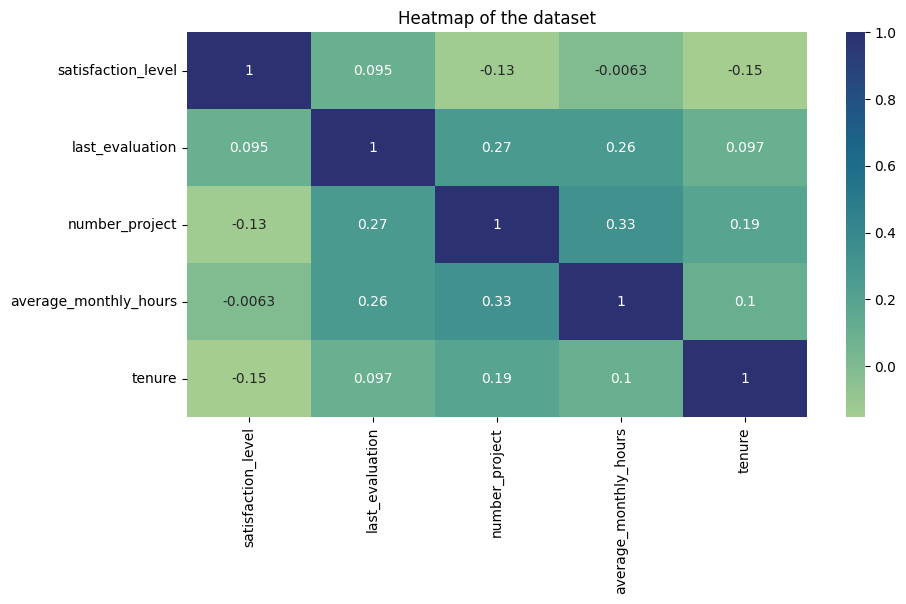

In [70]:
plt.figure(figsize=(10, 5))
columns_to_heatmap = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']
sns.heatmap(df_log_reg[columns_to_heatmap].corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

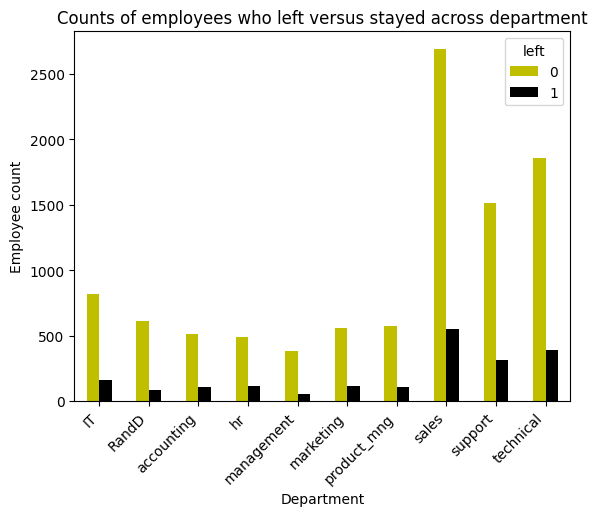

In [71]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (yellow color) represents employees who did not leave, 1 (black) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='yk')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.xticks(rotation=45, ha='right')
plt.show()

As logistic regression is quite sensitive to outliers, we will remove the outliers in the `tenure` column that were calculated earlier.

In [72]:
lower_limit, upper_limit = number_of_outliers_via_limits(df1, 'tenure')

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in tenure: 824


In [73]:
df_log_reg = df_log_reg[(df_log_reg['tenure'] >= lower_limit) & (df_log_reg['tenure'] <= upper_limit)]

df_log_reg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Next, we isolate the outcome variable (variable our model will be predicting)

In [74]:
y = df_log_reg['left']

Then, we select the features to use in model that will help predict the outcome variable `left`.

In [75]:
columns_features = ['satisfaction_level', 'last_evaluation', 'number_project', 
                    'average_monthly_hours', 'tenure', 'work_accident', 'promotion_last_5years', 'salary_high', 
                    'salary_low', 'salary_medium' , 'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr',
                    'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']

X = df_log_reg[columns_features]

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [76]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [77]:
# Construct and fit
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [78]:
# Predictions via logistic regression model on the test set
y_pred = log_clf.predict(X_test)

Now we will create a confusion matrix to visualize the results of our logistic regression model.

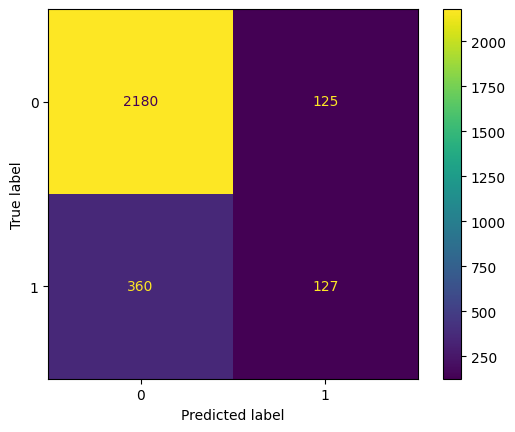

In [79]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

log_disp.plot()
plt.show()

The upper-left quadrant displays the number of **true negatives** (the number of people who **didn't leave** that the model **accurately** predicted did not leave)

The upper-right quadrant displays the number of **false positives** (The number of people who **didn't leave** the model **inaccurately** predicted as leaving.)

The bottom-left quadrant displays the number of **false negatives** (The number of people who **left** that the model **inaccurately** predicted did not leave)

The bottom-right quadrant displays the number of **true positives** (The number of people who **left** the model **accurately** predicted as leaving)

Next, we will create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Firstly, check the class balance in the data. This will inform the way to interpret accuracy metrics.

In [80]:
df_log_reg['left'].value_counts(normalize=True).apply(lambda x: round(x*100, 2)).to_frame()

,left
0,83.15
1,16.85


There is an approximately 83%-17% split. The data is not perfectly balanced, but it isn't too imbalanced. In our case, you can use this data without modifying the class balance and continue evaluating the model.

In [83]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.95      0.90      2305
    Predicted would leave       0.50      0.26      0.34       487

                 accuracy                           0.83      2792
                macro avg       0.68      0.60      0.62      2792
             weighted avg       0.80      0.83      0.80      2792



The classification report above shows that the logistic regression model achieved a:
* precision of 80% (all weighted averages)
* recall of 83% (all weighted averages)
* f1-score of 80% (all weighted averages)
* accuracy of 83%

### Modeling Approach 2: Tree-based Model

Decision Tree and Random Forest will be built here.

In [41]:
# Encode categorical variables
df_tree_model = pd.get_dummies(df1)

In [42]:
# Isolate the outcome variable
y = df_tree_model['left']
# Select the features
X = df_tree_model.drop('left', axis=1)

In [43]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

#### Desicion tree

Now we will construct a decision tree model and set up cross-validated grid-search to comprehensively search for the best model parameters.

In [44]:
tree = DecisionTreeClassifier(random_state=0)

# hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree_gridsearch = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [45]:
%%time
tree_gridsearch.fit(X_tr, y_tr)

CPU times: user 6.4 s, sys: 21.2 ms, total: 6.42 s
Wall time: 10.3 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'precision', 'f1', 'accuracy', 'roc_auc'})

Check the best parameters

In [46]:
tree_gridsearch.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [47]:
tree_gridsearch.best_score_

0.9703634179699269

An AUC score of 0.97 is indeed considered a strong score and suggests that the model is very good at discriminating between employees who will leave and those who will stay.

In [48]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'AUC': auc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
    return table

In [49]:
# Get all CV scores
tree_gridsearch_cv_results = make_results('decision tree cv', tree_gridsearch, 'auc')
tree_gridsearch_cv_results

<ipython-input-48-8541009d0946>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.970363,0.922167,0.921337,0.921719,0.974007


All of these scores from the decision tree model are strong indicators of good model performance. 

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. So we will do that next

#### Random forest

In [50]:
rf_clas = RandomForestClassifier(random_state=0)

# hyperparameters
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf = GridSearchCV(rf_clas, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [51]:
%%time
rf.fit(X_tr, y_tr)

CPU times: user 25min 11s, sys: 4.6 s, total: 25min 16s
Wall time: 25min 37s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'precision', 'f1', 'accuracy', 'roc_auc'})

In [52]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

        
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [53]:
path = '/notebooks/'

In [54]:
write_pickle(path, rf, 'hr_rf1')

In [55]:
rf = read_pickle(path, 'hr_rf1')

Check the best parameters

In [56]:
rf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

Identify the best AUC score achieved by the decision tree model on the training set.

In [57]:
rf.best_score_

0.9795790967836983

In [58]:
rand_for_cv_results = make_results('random forrest cv', rf, 'auc')
display(tree_gridsearch_cv_results)
display(rand_for_cv_results)

<ipython-input-48-8541009d0946>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.970363,0.922167,0.921337,0.921719,0.974007


,Model,AUC,Precision,Recall,F1,Accuracy
0,random forrest cv,0.979579,0.943576,0.923021,0.933145,0.978037


The evaluation scores of the random forest model are slightly better than those of the decision tree model by all metrics

Next, we will evaluate these models on the validation set.

In [59]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = round(roc_auc_score(y_test_data, preds), 3)
    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name],
                        'AUC': [auc],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
    return table

In [60]:
# Get the results on validation set for both models
tree_gridsearch_val_results = get_scores('decision tree1 val', tree_gridsearch, X_val, y_val)
rf_val_results = get_scores('random forest1 val', rf, X_val, y_val)

# Concatenate validation scores into table
all_val_results = [tree_gridsearch_val_results, rf_val_results]
all_val_results = pd.concat(all_val_results).sort_values(by='AUC', ascending=False)
all_val_results

,model,AUC,precision,recall,f1,accuracy
0,random forest1 val,0.954,0.955,0.917,0.936,0.979
0,decision tree1 val,0.952,0.924,0.920,0.922,0.974


On the validation set, the **random forest** model outperforms the decision tree model across most metrics.

Now use the best performing model to predict on the test set.

In [61]:
# Get predictions on test data
rf_test_scores = get_scores('random forest1 test', rf, X_test, y_test)
rf_test_scores

,model,AUC,precision,recall,f1,accuracy
0,random forest1 test,0.955,0.961,0.917,0.938,0.98


The test scores are similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

### Feature Engineering

Dropping `satisfaction_level` and creating a new feature `overworked` to capture whether an employee is overworked sounds like a reasonable approach. However, it's important to be cautious about creating new features that may introduce biases or mask important information in the data.

To create the overworked feature, we will use the `average_monthly_hours` column and compare it to a threshold that will be defined based on domain knowledge or statistical analysis. For example, we can consider employees who work more than 50 hours a week (i.e., more than 200 hours per month) as overworked.

Once `overworked` column is created, we can use it along with other relevant features to train new decision tree and random forest models. It will be a binary variable.

In [62]:
df3 = df1.drop('satisfaction_level', axis=1)

df3.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.53,2,157,3,0,1,0,sales,low
1,0.86,5,262,6,0,1,0,sales,medium
2,0.88,7,272,4,0,1,0,sales,medium
3,0.87,5,223,5,0,1,0,sales,low
4,0.52,2,159,3,0,1,0,sales,low


In [63]:
df3 = df3.rename({'average_monthly_hours':'overworked'}, axis=1)

# Inspect max and min average monthly hours values
print(f'Max hours: {df3.overworked.max()}')
print(f'Min hours: {df3.overworked.min()}')

Max hours: 310
Min hours: 96


167 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

200 hours will be threshold to `overworked` column

In [64]:
df3['overworked'] = np.where(df3['overworked']>200, 1, 0)

In [65]:
# One-hot encode the categorical variables as needed and save resulting dataframe in a new variable
df_new = pd.get_dummies(df3)

df_new.head()

,last_evaluation,number_project,overworked,tenure,work_accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.53,2,0,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.86,5,1,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.88,7,1,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.87,5,1,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.52,2,0,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [66]:
y = df_new['left']
X = df_new.drop('left', axis=1)

In [67]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Create train & validate data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

#### Decision tree - Round 2

In [68]:
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree_gridSearch2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [69]:
%%time
tree_gridSearch2.fit(X_tr, y_tr)

CPU times: user 4.22 s, sys: 22.9 ms, total: 4.24 s
Wall time: 4.34 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'precision', 'f1', 'accuracy', 'roc_auc'})

In [70]:
tree_gridSearch2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [71]:
tree_gridSearch2.best_score_

0.9541717814838208

This model performs very well, even without satisfaction levels and detailed hours worked data.

Now, let's check the other scores.

In [72]:
# Get all CV scores
tree2_cv_results = make_results('decision tree 2 round cv', tree_gridSearch2, 'auc')
tree2_cv_results

<ipython-input-48-8541009d0946>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree 2 round cv,0.954172,0.874178,0.908787,0.891037,0.963025


Some other scores have dropped. This was to be expected given that fewer features were taken into account in this round of the model. However, the performance is very good.

#### Random forest - Round 2

In [73]:
rf_сlass_2 = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf2 = GridSearchCV(rf_сlass_2, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [74]:
%%time
rf2.fit(X_tr, y_tr)

CPU times: user 19min 7s, sys: 3.93 s, total: 19min 11s
Wall time: 19min 16s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'precision', 'f1', 'accuracy', 'roc_auc'})

In [75]:
write_pickle(path, rf2, 'hr_rf2')

In [76]:
rf2 = read_pickle(path, 'hr_rf2')

In [77]:
rf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [78]:
rf2.best_score_

0.9679177743431088

In [79]:
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
display(tree2_cv_results)
display(rf2_cv_results)

<ipython-input-48-8541009d0946>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Model': model_name,


,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree 2 round cv,0.954172,0.874178,0.908787,0.891037,0.963025


,Model,AUC,Precision,Recall,F1,Accuracy
0,random forest2 cv,0.967918,0.914148,0.889548,0.901592,0.967751


Here the scores dropped slightly too, but the random forest performs better than the decision tree. 

Now we wil be testing model on validation set

In [80]:
# Collect validation scores 
tree2_val_results = get_scores('decision tree2 val', tree_gridSearch2, X_val, y_val)
rf2_val_results = get_scores('random forest2 val', rf2, X_val, y_val)

# Concatenate validation scores into table
all_val_results2 = [tree2_val_results, rf2_val_results]
all_val_results2 = pd.concat(all_val_results2).sort_values(by='AUC', ascending=False)
all_val_results2

,model,AUC,precision,recall,f1,accuracy
0,decision tree2 val,0.943,0.896,0.907,0.901,0.967
0,random forest2 val,0.936,0.910,0.889,0.900,0.967


If we consider together the metrics for both train and validation datasets, then the random forest is slightly better. Let's keep working with it.

In [81]:
rf2_test_scores = get_scores('random forrest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,AUC,precision,recall,f1,accuracy
0,random forrest2 test,0.937,0.906,0.892,0.899,0.967


This seems to be a stable, well-performing final model.

Plot a confusion matrix to visualize how well it predicts on the test set.

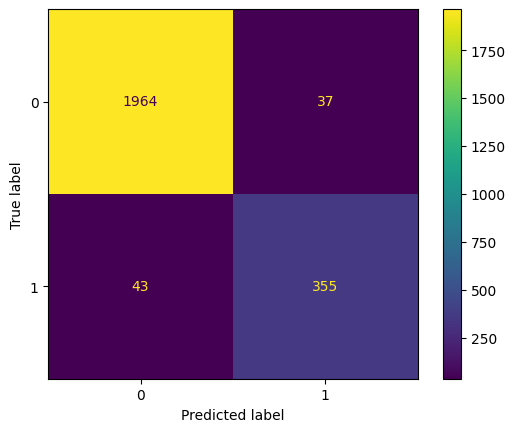

In [82]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot()

The final model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. However this is still a strong model.

For exploratory purpose, we will inspect the splits of the decision tree model and the most important features in the random forest model.

#### Decision tree splits

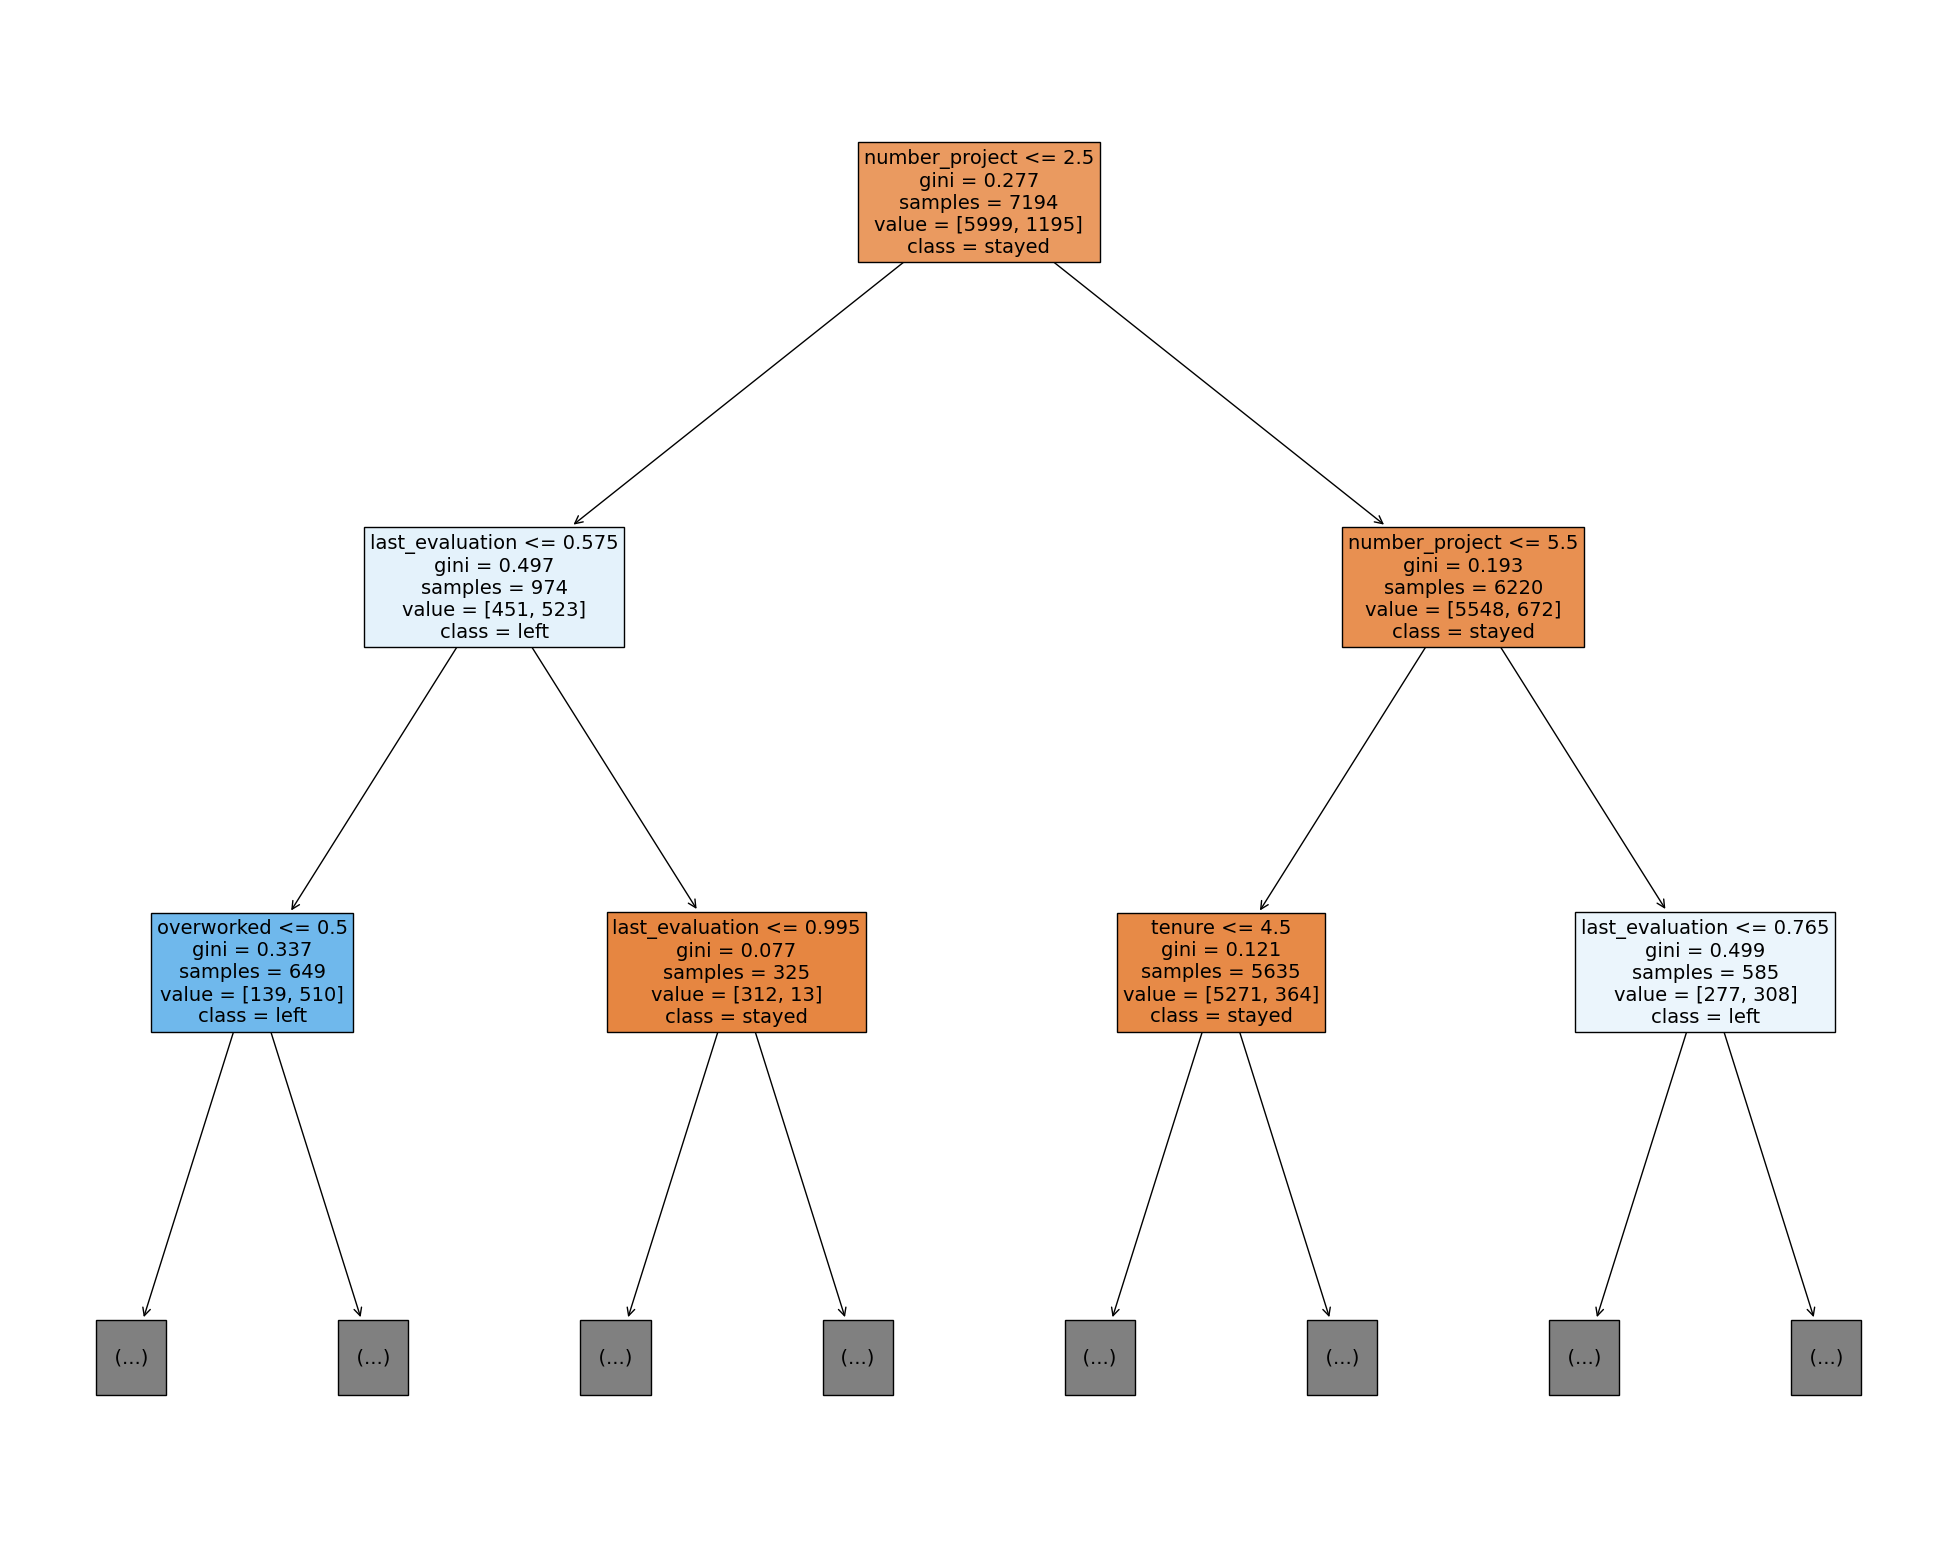

In [83]:
# Plot the tree
plt.figure(figsize=(25,20))
plot_tree(tree_gridSearch2.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

In [84]:
tree2_importances = pd.DataFrame(tree_gridSearch2.best_estimator_.feature_importances_, columns=['gini_importance'], index=X.columns)
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.366760
last_evaluation,0.352950
tenure,0.162956
overworked,0.115884
department_sales,0.000649
work_accident,0.000364
department_accounting,0.000236
salary_high,0.000118
department_marketing,0.000083


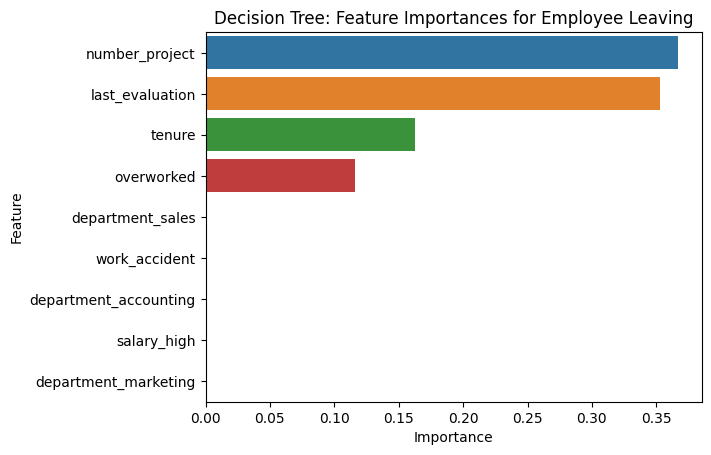

In [85]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, **last_evaluation**, **number_project**, **tenure**, and **overworked** have the highest importance. These variables are most helpful in predicting the outcome variable `left`.

#### Random forest feature importance

<Figure size 640x480 with 0 Axes>

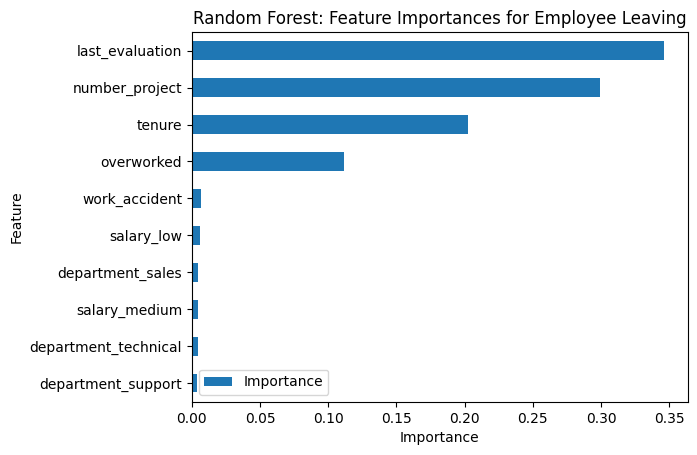

In [87]:
feat_import = rf2.best_estimator_.feature_importances_
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]
feat = X.columns[ind]
feat_import = feat_import[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_import})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()

ax1 = y_sort_df.plot(kind='barh',x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, `overworked`, `work_accident`, and `salary_low` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

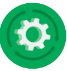
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 90.6%, recall of 89.2%, f1-score of 89.9%, and accuracy of 96.7%, on the test set. The random forest model slightly outperformed the decision tree model (AUC of 93.7%, precision of 90.6%, recall of 89.2%, f1-score of 89.9%, and accuracy of 96.7%, on the test set)

### Conclusion, Recommendations, Next Steps

The models and the extracted feature importances validate the notion that employees at the company are burdened with excessive workloads.

To ensure employee retention, the following recommendations could be proposed to the stakeholders:

* Enforce a limit on the number of projects assigned to each employee.
* Evaluate the possibility of promoting employees who have completed a minimum of four years with the company. Alternatively, conduct a thorough investigation to determine the reasons behind the dissatisfaction among employees with a four-year tenure.
* Explore options such as incentivizing employees for working longer hours or removing the requirement for extended work hours altogether.
* Communicate the company's overtime pay policies to employees who may not be familiar with them. Clearly articulate expectations regarding workload and time off if they are currently ambiguous.
* Facilitate company-wide and team-specific discussions to gain insights into the prevailing work culture and address any concerns comprehensively.
* Implement a balanced evaluation system that does not exclusively reward employees who work over 200 hours per month. Consider a proportional scale to recognize and reward employees based on their contributions and efforts.



**Next Steps**

There is still a valid concern regarding potential data leakage. It would be wise to assess the impact on predictions by excluding the `last_evaluation` feature from the dataset. If evaluations are infrequently conducted, it becomes valuable to predict employee retention without relying on this particular feature. Alternatively, if the evaluation score strongly influences whether an employee stays or leaves, it might be beneficial to shift focus and attempt to predict performance scores instead. A similar consideration applies to the satisfaction score.

For a separate project, you might consider constructing a K-means model using this dataset and analyzing the resulting clusters. This approach could provide valuable insights into patterns and groupings within the data.